In [1]:
# pip install xgboost
#!pip install imbalanced-learn

In [2]:
# Librerias

import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

![](https://www.iberdrola.com/documents/20125/40126/Deep_Learning_746x419.jpg/6f72011f-444c-bbfc-9d43-659d463a22c3?t=1626932434616g)

### ¿Que es un ensamble?
Al momento de estar entrenando diferentes modelos u algoritmos simples sobre un conjunto de datos, generalmente se comparan y contrastan los resultados que arroja cada uno de ellos para finalmente elegir el mejor. Sin embargo en ocasiones los resultados no son los mejores, incluso para el mejor modelo, por lo que para resolver este problema se crean los metodos de ensambles que combinan diferente tipos de algoritmos y aumentan su poder predictivo para
obtener mejores resultados.

En este sesion veremos dos tipos de ensambles:
1. Bagging
2. Boosting

### Bagging

También conocido como Bootstrap Aggregating, es un metodo de ensamble que busca reducir la varianza para evitar el sobreajuste, lo que resulta en una predicción más precisa al aplicarlo e los diferentes tipos de algoritmos de aprendizaje.



## Random Forest Classifier

**Random forest** es una técnica que hace uso del bagging sobre árboles de clasificación para producir mejores resultados.

En el siguiente ejemplo se muestra su implementacion sobre una base de datos que contiene informacion sobre el incumpliento o no de un credito, es decir se aplica un random forest sobre un problema de clasificacion:

In [3]:
df = pd.read_csv('default_credit_card.csv')
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_pymt_nm
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df.shape

(30000, 25)

La base contiene 25 variables las cuales significan lo siguiente:

| Campo | Descripción |
| --- | --- |
|ID| ID of each client|
|LIMIT_BAL| Amount of given credit in NT dollars (includes individual and family/supplementary credit|
|SEX| Gender (1=male, 2=female)|
|EDUCATION| (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)|
|MARRIAGE| Marital status (1=married, 2=single, 3=others)|
|AGE| Age in years|
|PAY_0| Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)|
|PAY_2| Repayment status in August, 2005 (scale same as above)|
|PAY_3| Repayment status in July, 2005 (scale same as above)|
|PAY_4| Repayment status in June, 2005 (scale same as above)|
|PAY_5| Repayment status in May, 2005 (scale same as above)|
|PAY_6| Repayment status in April, 2005 (scale same as above)|
|BILL_AMT1| Amount of bill statement in September, 2005 (NT dollar)|
|BILL_AMT2| Amount of bill statement in August, 2005 (NT dollar)|
|BILL_AMT3| Amount of bill statement in July, 2005 (NT dollar)|
|BILL_AMT4| Amount of bill statement in June, 2005 (NT dollar)|
|BILL_AMT5| Amount of bill statement in May, 2005 (NT dollar)|
|BILL_AMT6| Amount of bill statement in April, 2005 (NT dollar)|
|PAY_AMT1| Amount of previous payment in September, 2005 (NT dollar)|
|PAY_AMT2| Amount of previous payment in August, 2005 (NT dollar)|
|PAY_AMT3| Amount of previous payment in July, 2005 (NT dollar)|
|PAY_AMT4| Amount of previous payment in June, 2005 (NT dollar)|
|PAY_AMT5| Amount of previous payment in May, 2005 (NT dollar)|
|PAY_AMT6| Amount of previous payment in April, 2005 (NT dollar)|
|default_pymt_nm| Default payment (1=yes, 0=no)|

### 1) Registros Duplicados y Nulos

In [5]:
#Viendo registros duplicados
num_duplicados = len(df[df.duplicated()])
print("El número de duplicados es = ", num_duplicados)

El número de duplicados es =  0


In [6]:
#viendo si hay nulos:
df.isnull().sum()

ID                 0
LIMIT_BAL          0
SEX                0
EDUCATION          0
MARRIAGE           0
AGE                0
PAY_0              0
PAY_2              0
PAY_3              0
PAY_4              0
PAY_5              0
PAY_6              0
BILL_AMT1          0
BILL_AMT2          0
BILL_AMT3          0
BILL_AMT4          0
BILL_AMT5          0
BILL_AMT6          0
PAY_AMT1           0
PAY_AMT2           0
PAY_AMT3           0
PAY_AMT4           0
PAY_AMT5           0
PAY_AMT6           0
default_pymt_nm    0
dtype: int64

### 2) Distribuciones de Variables

In [7]:
#Distribución de nuestra variable respuesta:
df['default_pymt_nm'].value_counts(normalize=True)*100 #está algo desbalanceado

default_pymt_nm
0    77.88
1    22.12
Name: proportion, dtype: float64

In [8]:
df['EDUCATION'].value_counts() # 4,5,6 y 0 unirlos

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [9]:
df['MARRIAGE'].value_counts(normalize=True)

MARRIAGE
2    0.532133
1    0.455300
3    0.010767
0    0.001800
Name: proportion, dtype: float64

### 3) Dividiendo nuestras features en variables de intervalo o escala de razón y variables categóricas.

In [10]:
# En ocasiones, variables que son numéricas (escala de razón o intervalo) nos conviene tratarlas como categóricas SI TIENEN POCOS
#VALORES DISTINTOS:
df.nunique()

ID                 30000
LIMIT_BAL             81
SEX                    2
EDUCATION              7
MARRIAGE               4
AGE                   56
PAY_0                 11
PAY_2                 11
PAY_3                 11
PAY_4                 11
PAY_5                 10
PAY_6                 10
BILL_AMT1          22723
BILL_AMT2          22346
BILL_AMT3          22026
BILL_AMT4          21548
BILL_AMT5          21010
BILL_AMT6          20604
PAY_AMT1            7943
PAY_AMT2            7899
PAY_AMT3            7518
PAY_AMT4            6937
PAY_AMT5            6897
PAY_AMT6            6939
default_pymt_nm        2
dtype: int64

In [11]:
variables_numericas = []
variables_categoricas = []

#Si una variable tiene + de 13 categorías/valores distintos la trataremos como numérica (escala de razón o de intervalo)
# de lo contrario como categórica:
for col in df.columns:
    if df[col].nunique() > 13:
        variables_numericas.append(col)
    else:
        variables_categoricas.append(col)
        
print(f'variables numéricas : {variables_numericas}')
print(f'variables categóricas : {variables_categoricas}')

variables numéricas : ['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
variables categóricas : ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default_pymt_nm']


### 4) Inspeccionado outliers

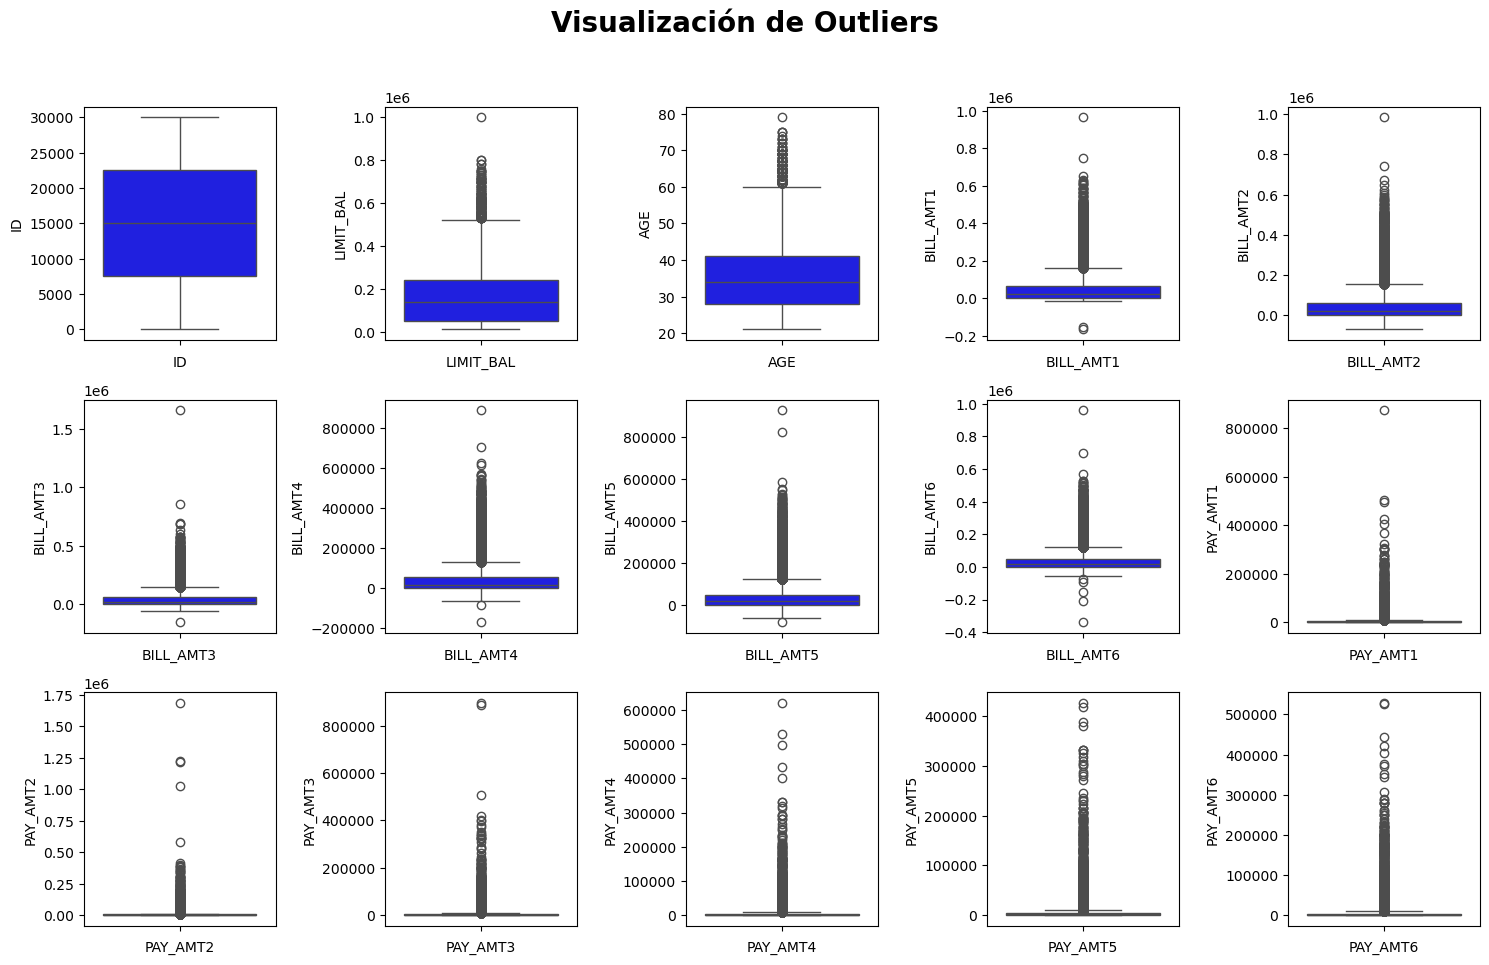

In [12]:
# figsize
plt.figure(figsize=(15,12))

plt.suptitle('Visualización de Outliers', fontsize=20, fontweight='bold', y=1.02)

for i, col in enumerate(variables_numericas):
    plt.subplot(4,5,i+1)
    sns.boxplot(df[col], color = 'b')
    plt.xlabel(col)
    plt.tight_layout()     

In [13]:
##

In [14]:
## Vamos a truncar los outliers utilizando el criterio de rango intercuartílico:
def ajusta_outliers(df):
    for col in df[variables_numericas]:
        #usando el IQR para definir límites:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        rango_iq = q3 -q1
        cota_inf = q1 - 1.6*rango_iq
        cota_sup = q3 + 1.6*rango_iq
        df[col] = df[col].clip(cota_inf, cota_sup) #ajusta valores fuera de las cotas, los trunca a estas cotas.
    return df 


In [15]:
#tratando los outliers según lo especificado en la función
dataf = ajusta_outliers(df)

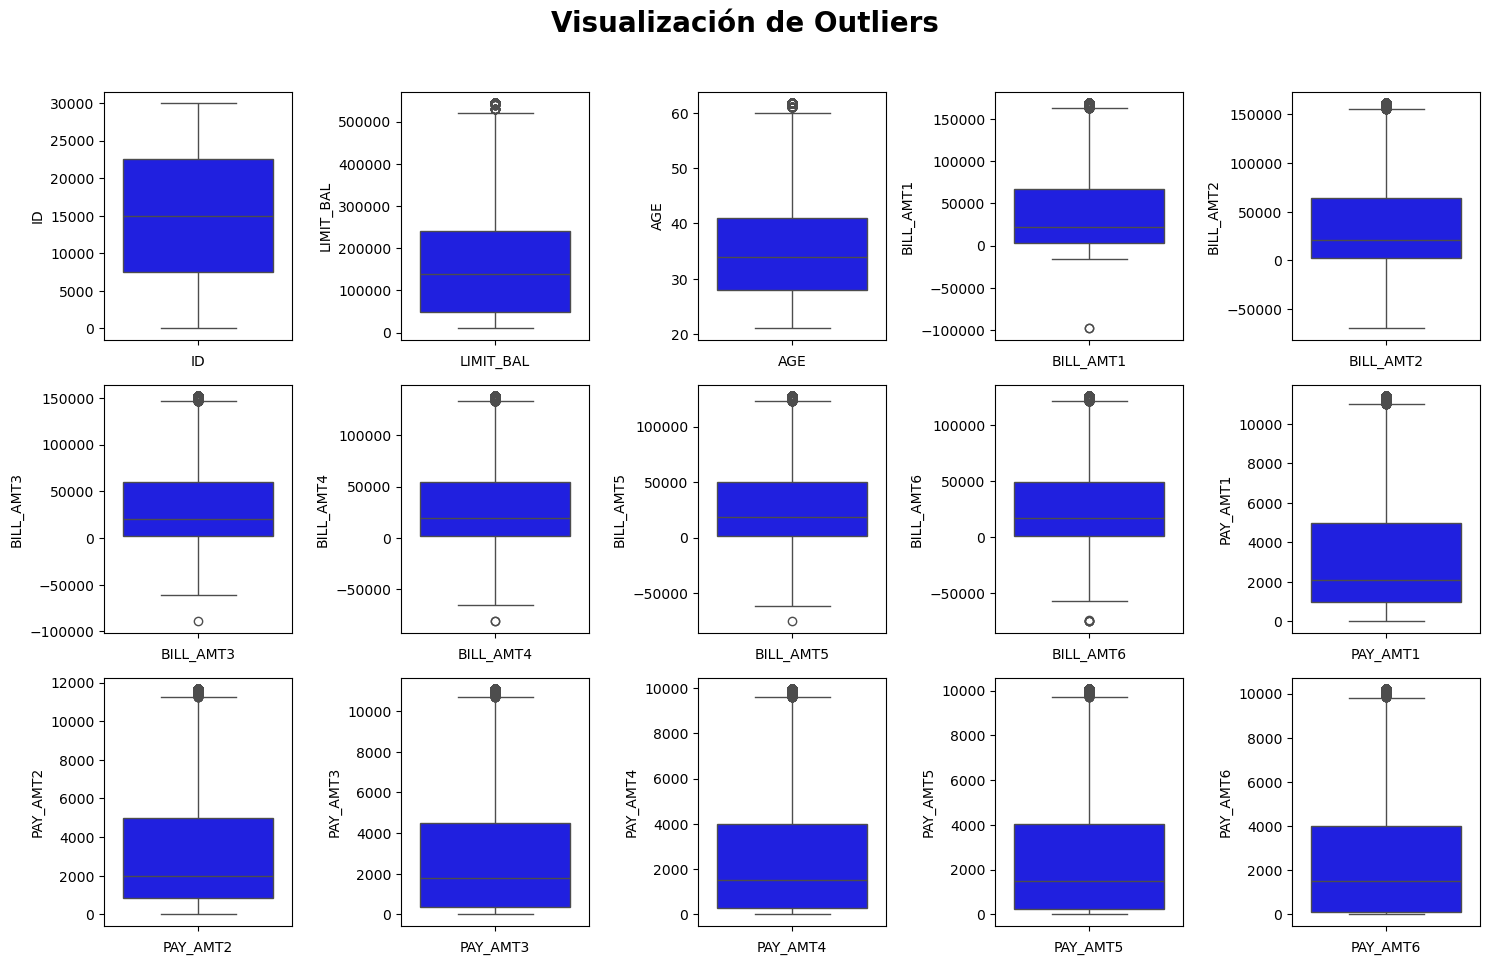

In [16]:
#Visualizando el efecto de este tratamiento:
plt.figure(figsize=(15,12))

plt.suptitle('Visualización de Outliers', fontsize=20, fontweight='bold', y=1.02)

for i, col in enumerate(variables_numericas):
    plt.subplot(4,5,i+1)
    sns.boxplot(dataf[col], color = 'b')
    plt.xlabel(col)
    plt.tight_layout() 

In [17]:
#Actualizar mis listas de variables porque ahora estoy trabajando con dataf:
variables_numericas = []
variables_categoricas = []

#Si una variable tiene + de 13 categorías/valores distintos la trataremos como numérica (escala de razón o de intervalo)
# de lo contrario como categórica:
for col in dataf.columns:
    if dataf[col].nunique() > 13:
        variables_numericas.append(col)
    else:
        variables_categoricas.append(col)
        
print(f'variables numéricas : {variables_numericas}')
print(f'variables categóricas : {variables_categoricas}')

variables numéricas : ['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
variables categóricas : ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default_pymt_nm']


In [18]:
dataf[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,44783.842117,42866.196718,40582.454802,36990.403330,34181.888067,33009.075127
std,52440.898260,50364.516260,47754.025544,43754.532616,40863.571909,40313.705694
min,-98092.850000,-69777.000000,-89331.350000,-81160.050000,-75721.000000,-75451.600000
25%,3558.750000,2984.750000,2666.250000,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,20088.500000,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,60164.750000,54506.000000,50190.500000,49198.250000
max,168742.600000,161640.650000,152162.350000,137992.800000,127674.500000,125905.850000


### 5) Feature engineering (ingeniería de características)

In [19]:
#filtrar los montos mayores o iguales a cero
dataf = dataf[dataf['BILL_AMT1']>=0]
dataf = dataf[dataf['BILL_AMT2']>=0]
print(dataf.shape)

(29056, 25)


In [20]:
dataf['EDUCATION'].value_counts()

EDUCATION
2    13689
1    10128
3     4784
5      274
4      116
6       51
0       14
Name: count, dtype: int64

In [21]:
# En el campo EDUCATION mandamos las categorías etiquetadas como 'unknown' a la clase 'others'.
dataf['EDUCATION'] = np.where(dataf['EDUCATION']==5,4, dataf['EDUCATION'])
dataf['EDUCATION'] = np.where(dataf['EDUCATION']==6,4, dataf['EDUCATION'])
dataf['EDUCATION'] = np.where(dataf['EDUCATION']==0,4, dataf['EDUCATION'])

In [22]:
dataf['EDUCATION'].value_counts()

EDUCATION
2    13689
1    10128
3     4784
4      455
Name: count, dtype: int64

In [23]:
dataf['MARRIAGE'].value_counts()

MARRIAGE
2    15464
1    13226
3      312
0       54
Name: count, dtype: int64

In [24]:
dataf['MARRIAGE'] = np.where(dataf['MARRIAGE']==0,3,dataf['MARRIAGE'])
dataf['MARRIAGE'].value_counts()

MARRIAGE
2    15464
1    13226
3      366
Name: count, dtype: int64

In [25]:
dataf[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].corr()
# tal vez podríamos quedarnos sólo con 'BILL_AMT1' y 'BILL_AMT6' porque todas las demás están muy correlacionadas --> redundancia

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
BILL_AMT1,1.000000,0.949699,0.904142,0.856971,0.823725,0.798138
BILL_AMT2,0.949699,1.000000,0.942170,0.891500,0.853042,0.825328
BILL_AMT3,0.904142,0.942170,1.000000,0.933808,0.889353,0.857026
BILL_AMT4,0.856971,0.891500,0.933808,1.000000,0.937059,0.898404
BILL_AMT5,0.823725,0.853042,0.889353,0.937059,1.000000,0.943919
BILL_AMT6,0.798138,0.825328,0.857026,0.898404,0.943919,1.000000


In [26]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29056 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               29056 non-null  int64  
 1   LIMIT_BAL        29056 non-null  float64
 2   SEX              29056 non-null  int64  
 3   EDUCATION        29056 non-null  int64  
 4   MARRIAGE         29056 non-null  int64  
 5   AGE              29056 non-null  float64
 6   PAY_0            29056 non-null  int64  
 7   PAY_2            29056 non-null  int64  
 8   PAY_3            29056 non-null  int64  
 9   PAY_4            29056 non-null  int64  
 10  PAY_5            29056 non-null  int64  
 11  PAY_6            29056 non-null  int64  
 12  BILL_AMT1        29056 non-null  float64
 13  BILL_AMT2        29056 non-null  float64
 14  BILL_AMT3        29056 non-null  float64
 15  BILL_AMT4        29056 non-null  float64
 16  BILL_AMT5        29056 non-null  float64
 17  BILL_AMT6        

In [27]:
dataf[variables_categoricas]=dataf[variables_categoricas].astype(str)
dataf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29056 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               29056 non-null  int64  
 1   LIMIT_BAL        29056 non-null  float64
 2   SEX              29056 non-null  object 
 3   EDUCATION        29056 non-null  object 
 4   MARRIAGE         29056 non-null  object 
 5   AGE              29056 non-null  float64
 6   PAY_0            29056 non-null  object 
 7   PAY_2            29056 non-null  object 
 8   PAY_3            29056 non-null  object 
 9   PAY_4            29056 non-null  object 
 10  PAY_5            29056 non-null  object 
 11  PAY_6            29056 non-null  object 
 12  BILL_AMT1        29056 non-null  float64
 13  BILL_AMT2        29056 non-null  float64
 14  BILL_AMT3        29056 non-null  float64
 15  BILL_AMT4        29056 non-null  float64
 16  BILL_AMT5        29056 non-null  float64
 17  BILL_AMT6        

In [28]:
#renombrar columnas
dataf.rename(columns = {'default_pymt_nm':'Default'}, inplace = True)
dataf['Default'] = dataf['Default'].astype(int) #XGBoost lo requiere
dataf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29056 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         29056 non-null  int64  
 1   LIMIT_BAL  29056 non-null  float64
 2   SEX        29056 non-null  object 
 3   EDUCATION  29056 non-null  object 
 4   MARRIAGE   29056 non-null  object 
 5   AGE        29056 non-null  float64
 6   PAY_0      29056 non-null  object 
 7   PAY_2      29056 non-null  object 
 8   PAY_3      29056 non-null  object 
 9   PAY_4      29056 non-null  object 
 10  PAY_5      29056 non-null  object 
 11  PAY_6      29056 non-null  object 
 12  BILL_AMT1  29056 non-null  float64
 13  BILL_AMT2  29056 non-null  float64
 14  BILL_AMT3  29056 non-null  float64
 15  BILL_AMT4  29056 non-null  float64
 16  BILL_AMT5  29056 non-null  float64
 17  BILL_AMT6  29056 non-null  float64
 18  PAY_AMT1   29056 non-null  float64
 19  PAY_AMT2   29056 non-null  float64
 20  PAY_AMT3   

### 6) Split, estandarización y Modelos

In [29]:
##### Split training/test y estandarizando los datos:
X = dataf.drop(['ID','Default','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5'], axis = 1) # predictoras
y = dataf['Default'] #respuesta

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, stratify = y,
                                                   random_state = 42)


scale = StandardScaler()
std_X_train = scale.fit_transform(X_train)
std_X_test = scale.transform(X_test)


In [30]:
X.shape

(29056, 19)

In [31]:
dataf.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000.0,2,2,1,24.0,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26.0,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34.0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37.0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57.0,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,11667.2,10000.0,9000.0,689.0,679.0,0


#### Corriendo  modelo con clase desbalanceada y viendo desempeño del mismo. Usaremos un RandomForestClassifier

In [32]:
## Ajuste de hiperparametros: creamos el grid para probar diferentes valores
param_dist = {'n_estimators': [50,100, 150],
             'max_features': [5,6,7,8,9,10,11,12],
             'max_depth': np.arange(3,10),
             'criterion': ['gini', 'entropy']}

# Deinir el modelo
rf = RandomForestClassifier()

# le pasamos el grid para que lo ajuste utilizando validación cruzada
rf_cv = RandomizedSearchCV(rf, param_distributions= param_dist, n_iter=30, cv=5, random_state=42, n_jobs= -1, scoring='f1')
rf_cv.fit(std_X_train, y_train)
print("Los mejores hiperparámetros del random forest son: %s" % (rf_cv.best_params_))

y_pred = rf_cv.predict(std_X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

Los mejores hiperparámetros del random forest son: {'n_estimators': 50, 'max_features': 9, 'max_depth': 8, 'criterion': 'gini'}
Accuracy: 0.823237885462555

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5647
           1       0.69      0.38      0.49      1617

    accuracy                           0.82      7264
   macro avg       0.76      0.67      0.69      7264
weighted avg       0.81      0.82      0.80      7264



In [33]:
#calibrando el punto de corte:
from sklearn.metrics import precision_recall_curve, f1_score

param_dist = {'n_estimators': [50,100, 150],
             'max_features': [5,6,7,8,9,10,11,12],
             'max_depth': np.arange(3,10),
             'criterion': ['gini', 'entropy']}

rf = RandomForestClassifier()
rf_cv = RandomizedSearchCV(rf, param_distributions= param_dist, n_iter=30, cv=5, random_state=42, n_jobs= -1, scoring='f1')
rf_cv.fit(std_X_train, y_train)

#Obtener las probabilidades de Y=1 para cada observación del conjunto de test:
y_probs = rf_cv.predict_proba(std_X_test)[:,1] #probabilidades para y=1

# Encontrar el punto de corte 'optimo' basándonos en la curva Precision-Recall (maximize el F1)
precisions, recalls, thresholds_pr = precision_recall_curve(y_test, y_probs)
f1_scores = 2*(precisions*recalls) / (precisions + recalls) #calculando el F1-score para cada umbral o punto de corte
optimal_threshold = thresholds_pr[np.argmax(f1_scores)]

print(f"Punto de corte optimo (optimal threshold) según nuestra Precision-recall curve: {optimal_threshold}")

#predicciones finales usando el punto de corte óptimo:
y_pred_optimal = (y_probs >= optimal_threshold).astype(int)

#evaluar el performance del modelo con el nuevo punto de corte:
f1 = f1_score(y_test, y_pred_optimal)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_optimal))
print()
print(classification_report(y_test, y_pred_optimal))



Punto de corte optimo (optimal threshold) según nuestra Precision-recall curve: 0.29767171087732025
Accuracy: 0.8010737885462555

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      5647
           1       0.55      0.54      0.55      1617

    accuracy                           0.80      7264
   macro avg       0.71      0.71      0.71      7264
weighted avg       0.80      0.80      0.80      7264



In [38]:
## USANDO GridSearchCV en lugar RandomizedSearchCV:

param_dist = {'n_estimators': [50,100, 150],
             'max_features': [5,6,7,8,9,10,11,12],
             'max_depth': np.arange(3,10),
             'criterion': ['gini', 'entropy']}

# Deinir el modelo
rf = RandomForestClassifier()

#le voy a pasar el grid para que haga búsqueda exhaustiva con validación cruzada:
gs_cv = GridSearchCV(rf, param_dist, cv=5)
gs_cv.fit(std_X_train, y_train)

y_pred = gs_cv.predict(std_X_test)
print(classification_report(y_test, y_pred))

KeyboardInterrupt: 

### SMOTE (Synthetic Minority Oversampling Technique)

En modelos de ML con conjuntos de datos desequilibrados, donde una clase  es mucho más grande que la otra, el modelo podría ignorar la clase más pequeña porque se enfoca en obtener el mayor número de respuestas correctas en general, lo que significa predecir la clase más grande la mayoría del tiempo.

En lugar de simplemente duplicar los ejemplos / muestras de la clase minoritaria para hacerlos iguales en tamaño, lo cual puede llevar a que el modelo memorice estos ejemplos, SMOTE crea nuevos ejemplos **sintéticos** que son similares pero no idénticos a los originales del grupo más pequeño. Lo hace tomando un ejemplo de la clase minoritaria y luego mirando a sus vecinos más cercanos en la misma clase. SMOTE elige uno de estos vecinos y genera un nuevo ejemplo que es una mezcla entre el ejemplo original y su vecino.

Este proceso agrega más variedad a los datos de entrenamiento relacionados con la clase minoritaria, ayudando al modelo a aprender más sobre ella y, frecuentemente, tomando mejores decisiones sin simplemente ignorarla.

### Modelo con SMOTE:

In [42]:
#SMOTE después del SPLIT:

from collections import Counter
from imblearn.over_sampling import SMOTE

#Aplicando SMOTE:
smote = SMOTE(random_state=42)
X_smt, y_smt = smote.fit_resample(std_X_train, y_train)

#grid de hiperparámetros:

param_dist = {'n_estimators': [50,100, 150, 200],
             'max_features': [5,6,7,8,9,10,11,12],
             'max_depth': np.arange(3,10),
             'criterion': ['gini', 'entropy']}

rf = RandomForestClassifier()

rf_cv = RandomizedSearchCV(rf, param_distributions = param_dist, cv=5, random_state=42, 
                           n_jobs=-1, n_iter=30, scoring= 'f1' )

rf_cv.fit(X_smt, y_smt)

y_pred = rf_cv.predict(std_X_test)
print("mejores hiperparámetros: ", rf_cv.best_params_)
print()
print(classification_report(y_test, y_pred))

mejores hiperparámetros:  {'n_estimators': 200, 'max_features': 9, 'max_depth': 9, 'criterion': 'gini'}

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      5647
           1       0.52      0.56      0.54      1617

    accuracy                           0.79      7264
   macro avg       0.70      0.71      0.70      7264
weighted avg       0.79      0.79      0.79      7264



In [41]:
#Sólo para ver el efecto de muestreo de SMOTE:
print(Counter(y_train))
print(" ")
print(Counter(y_smt))

Counter({0: 16940, 1: 4852})
 
Counter({0: 16940, 1: 16940})


### Information Gain

Supongamos que tenemos un conjunto de ejemplos $S$, donde cada ejemplo está etiquetado con una clase $C_k$ y tiene un conjunto de características $\mathbf{F}$. Podemos calcular la **entropía** de la distribución de clases en $S$ de la siguiente manera:

$$ H(S) = - \sum_{k} p_k \log_2 p_k $$

donde $p_k$ es la proporción de ejemplos en $S$ que pertenecen a la clase $C_k$. Si todos los ejemplos en $S$ pertenecen a la misma clase, la entropía es 0. Si los ejemplos están distribuidos uniformemente entre todas las clases, la entropía es máxima.

Ahora supongamos que queremos dividir el conjunto de ejemplos $S$ basándonos en el valor de una característica $F_i$. Podemos calcular la ganancia de información de esta división, que induce una PARTICIÓN EN NUESTRO DATASET, de la siguiente manera:

$$ \text{IG}(S, F_i) = H(S) - \sum_{v \in \text{values}(F_i)} \frac{|S_v|}{|S|} H(S_v) $$

donde $S_v$ es el subconjunto de ejemplos en $S$ que tienen el valor $v$ para la característica $F_i$, y $\text{values}(F_i)$ es el conjunto de posibles valores para $F_i$. La ganancia de información es la reducción en entropía lograda al dividir $S$ basándose en $F_i$. **Si la característica $F_i$ tiene una alta ganancia de información, significa que es una característica útil para distinguir entre clases.**


In [ ]:
##### Si quisiéramos definir el modelo de forma explícita (NO ES NECESARIO gracias al parámetro 'refit' que está puesto en True por default)

# Inicializamos el algoritmo con los mejores hiperparametros que encontramos previamente:

# Ran = RandomForestClassifier(n_estimators=200, criterion = 'gini', max_depth = 9, max_features=9)

#Equivalentemente, se puede escribir:
#Ran = RandomForestClassifier(**rf_cv.best_params_)

# Se entrena el modelo sobre el conjunto de datos de entrenamiento
#Ran.fit(X_smt, y_smt)



#### Evaluando el modelo
"""
# PREDICCIONES:
y_pred = Ran.predict(std_X_test)
print(classification_report(y_test, y_pred))

#lo siguiente es sólo formato de la matriz de confusión:
plt.figure(figsize = (4,3))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt="d",
           xticklabels = ['Non-default', 'Default'],
           yticklabels = ['Non-default', 'Default'])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - RF')
"""

### Boosting

Es un metodo de ensamble secuencial que incrementa el poder predictivo de los algoritmos ajustando o incrementando el peso u importancia de las variables dado el ultimo modelo entrenado.

Cuando se utiliza boosting, se usa el conjunto de datos original para entrenar un primer modelo, despues se entrena un segundo modelo que intenta corregir los errores que tuvo el primer modelo y asi sucesivamente con n entrenamientos, donde al final se alncanza una mejor precision y un error más pequeño que el modelo original. Por lo anterior es que se le conoce como un metodo de ensamble secuencial.

<img src="bagboost.png" alt="Alt text" style="width: 700px;"/>

Existen diferentes algoritmos basados en esta tecnica de ensamble pero en particular uno ha destacado por encima de los demás: **XGBoost**

## XGBoost

Para entender de manera intuitiva la importancia de este algoritmo debemos entender como ha evolucionado respecto a otros modelos de machine learning;

<img src="xgboost.png" alt="Alt text" style="width: 700px;"/>

Como se observa arriba el XGboost  es un random forest al cual se le han aplicado técnicas de boosting para minimizar el error y se refinado a nivel computacional para obtener un algoritmo sumamente rapido y eficaz en sus predicciones (XGBoost es uno de los algoritmos preferidos en competiciones de Kaggle).

Al ser su origen el algoritmo de decision trees, puede usarse tambien para problemas de regresión y de clasificacion, por lo tanto lo aplicaremos sobre la misma base que ya se ha revisado anteriormente.

In [43]:
##### Ajuste de hiperparametros

# Creamos un grid para probar diferentes hiperparametros del xgboost que se ajuste
# mejor a nuestros datos
param_dist = {'max_depth': np.arange(1,10),
             'n_estimators': [30, 40, 50,100,150,200,250],
             'eta': [0.005,0.01,0.025,0.05,0.075,0.1,0.15,0.2,0.25], #learning rate
             'colsample_bytree': [0.5,0.6,0.8,1],
             'subsample': [0.7,0.8,0.9,1]}

#Definir el algoritmo de xgboost para clasificar:
xgb_model = XGBClassifier(objective = 'binary:hinge')

#le damos el grid que definimos antes para que realice la validación cruzada:
xgb_model_cv = RandomizedSearchCV(xgb_model, param_distributions = param_dist, cv=5, random_state=42,n_iter=30, 
                                  scoring = 'f1')
#entrenamiento del modelo:
xgb_model_cv.fit(X_smt, y_smt)

print("Los mejores hiperparametros del XGBoost son: %s" % (xgb_model_cv.best_params_))

Los mejores hiperparametros del XGBoost son: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 8, 'eta': 0.15, 'colsample_bytree': 0.8}


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      5647
           1       0.54      0.42      0.47      1617

    accuracy                           0.79      7264
   macro avg       0.69      0.66      0.67      7264
weighted avg       0.78      0.79      0.78      7264



Text(0.5, 1.0, 'Matriz de Confusión - XGBoost')

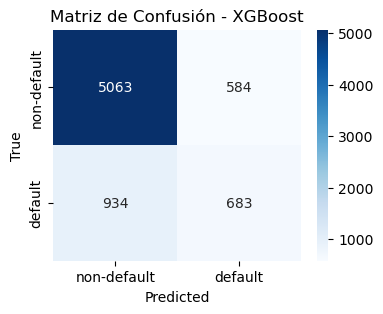

In [45]:
#### Evaluando el modelo: predicciones y reporte de clasificación
y_pred = xgb_model_cv.predict(std_X_test)
print(classification_report(y_test, y_pred))

#lo siguiente es sólo formato de la matriz de confusión:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test, y_pred)
sns.heatmap(ConfMatrix, annot=True, cmap="Blues", fmt="d",
           xticklabels = ['non-default', 'default'],
           yticklabels = ['non-default', 'default'])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title("Matriz de Confusión - XGBoost")


## Importante en XGBoost

En XGBoost, el parámetro **eta** ($\eta$), también conocido como la tasa de aprendizaje, se utiliza para prevenir el sobreajuste controlando la ponderación de los nuevos árboles añadidos al modelo. Controla el tamaño del paso en cada iteración mientras se avanza hacia un mínimo de una función de pérdida. En otras palabras, escala la contribución de cada árbol por un factor de 0 < $\eta$ < 1 antes de añadirlos al modelo final.


**Ventajas boosting:**
- Eficaz para reducir la varianza y reducir errores de clasificacion.
- Util cuando se tienen missing values, ya que al ser varios modelos entrenados secuencialmente pueen lidiar este tipo de datos.

**Desventajas boosting:**
- Es complicado manejar de manera individual el funcionamiento de cada modelo e incrementar la importancia de los datos a partir de cada error.
- Cada modelo sucesor depende del último, por lo que puede incrementarse el error exponencialmente desde un inicio si no se tiene cuidado.


### Similitudes entre Bagging y Boosting

- Son técnicas de ensamble: Bagging y boosting son tecnicas de ensambles que permiten potenciar el poder predictivo de los algoritmos.

- Reducción de la varianza: Ambos ayudan a resolver el problema del incremento de la varianza y el sobreajuste.

- Generan datos: Ambos generan aleatoriamente varios subconjunto de datos aplicando tecnicas de muestreo y otros cambios

- Promedio de los resultados obtenidos: Ambos métodos generan N modelos, pero al final arrojan solo una predicción.

### Diferencias entre Bagging y Boosting

|  | Boosting | Bagging |
| --- | --- | --- |
| Dataset | Utilizar varios conjuntos de datos para entrenar los modelos con algunas sustituciones | Cada vez va variando el peso de las variables para entrenar el siguiente modelo. |
| Issue | Reduce el bias | Reduce la varianza y e sobreajuste |
| Orden | Es secuencial | Es paralelo |
| Uso | Cuando el clasiificador tiene alto bias | Cuando el clasificador tiene alta varianza |
| Weights | El peso se incrementa en cada observacion al detectar un error en la predicción | Se tiene el mismo peso en cada obervacion |
| Efectos | Cada modelo se ve afectado por el anterior | Todos los modelos son independientes |
| Ejemplo | XGBoost | Random Forest |



### BORDERLINE SMOTE (Synthetic Minority Oversampling Technique)

SMOTE (Synthetic Minority Over-sampling Technique) Fronterizo es una variante del algoritmo SMOTE original diseñada para generar muestras sintéticas para la clase minoritaria en un conjunto de datos desbalanceado. El principal objetivo de SMOTE Fronterizo es mejorar el rendimiento de clasificación de la clase minoritaria equilibrando el conjunto de datos. Se enfoca en crear instancias sintéticas cerca del **borde** entre las clases minoritaria y mayoritaria, donde la clasificación suele ser más difícil.

Ejemplo:

Supongamos que tienes un conjunto de datos de transacciones bancarias con dos clases: 'fraude' (clase minoritaria) y 'no fraude' (clase mayoritaria). El conjunto de datos está desbalanceado, con solo unas pocas instancias de 'fraude' en comparación con un gran número de instancias de 'no fraude'.

**Aplicando SMOTE Fronterizo**:

1. Identificar los k-vecinos más cercanos (por ejemplo, k=5) de cada instancia de la clase minoritaria. Los vecinos pueden ser instancias de la clase mayoritaria o minoritaria.

2. Determinar si una instancia de la clase minoritaria es un punto fronterizo, punto de ruido o punto seguro:

    Punto fronterizo: Si más de la mitad de sus k-vecinos más cercanos pertenecen a la clase mayoritaria.
    Punto de ruido: Si todos sus k-vecinos más cercanos pertenecen a la clase mayoritaria.
    Punto seguro: Si más de la mitad de sus k-vecinos más cercanos pertenecen a la clase minoritaria.
    Crear instancias sintéticas solo para puntos fronterizos, de la siguiente manera:

        - Seleccionar aleatoriamente uno de los k-vecinos más cercanos de la clase minoritaria.
        - Calcular la diferencia entre los valores de las características del vecino seleccionado y la instancia fronteriza.
        - Multiplicar la diferencia por un número aleatorio entre 0 y 1, y luego sumar el resultado a los valores de las características de la instancia fronteriza.
        - Esto crea una nueva instancia sintética, que se agregará al conjunto de datos.
        
Al enfocarse en puntos fronterizos, SMOTE Fronterizo ayuda al clasificador a distinguir mejor entre las dos clases cerca del límite de decisión. Evita generar muestras sintéticas en áreas densas de la clase minoritaria (puntos seguros) o lejos de la clase mayoritaria.


In [47]:
#el "mejor" modelo sin más adecuaciones fue el siguiente:
from imblearn.over_sampling import BorderlineSMOTE

#aplicando Borderline SMOTE:
smote = BorderlineSMOTE(random_state=42)
X_smt, y_smt = smote.fit_resample(std_X_train, y_train)

#grid de hiperparámetros:
param_dist = {'n_estimators': [50,100, 150, 200],
             'max_features': [5,6,7,8,9,10,11,12],
             'max_depth': np.arange(3,10),
             'criterion': ['gini', 'entropy']}

rf = RandomForestClassifier()

rf_cv = RandomizedSearchCV(rf, param_distributions = param_dist, cv=5, random_state=42, 
                           n_jobs=-1, n_iter=30, scoring= 'f1' )
rf_cv.fit(X_smt, y_smt)

y_pred = rf_cv.predict(std_X_test)

print("mejores hiperparámetros: ", rf_cv.best_params_)
print()
print(classification_report(y_test, y_pred))

mejores hiperparámetros:  {'n_estimators': 200, 'max_features': 9, 'max_depth': 9, 'criterion': 'gini'}

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      5647
           1       0.47      0.60      0.53      1617

    accuracy                           0.76      7264
   macro avg       0.67      0.70      0.68      7264
weighted avg       0.79      0.76      0.77      7264



In [ ]:
#Ejercicio:
# Al modelo anterior, consideren implementar el punto de corte "optimo" usando precision -recall curve y comparen el rdo.
# Implementar un XGBoost classifier con punto de corte "optimo" usando precision -recall curve y SMOTE. Para ello, poner el 
# parámetro objective='binary:logistic'.


### Intro - SVMs

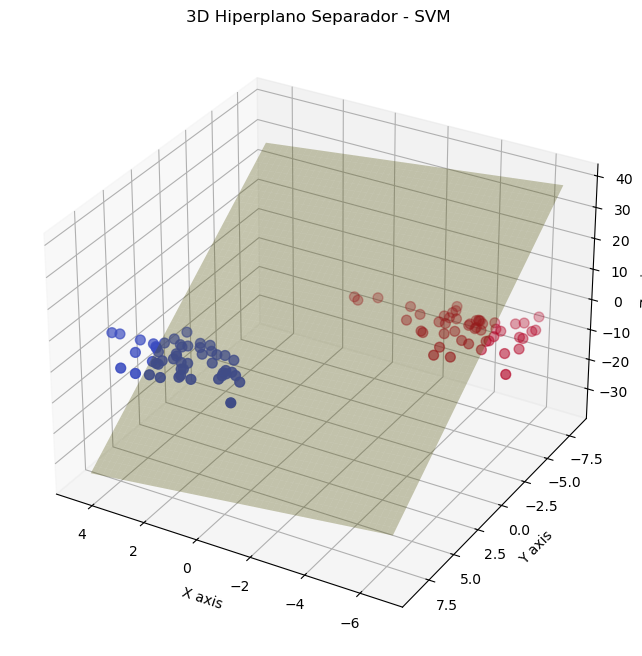

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# Generando data con dos clases
X, y = make_blobs(n_samples=100, centers=2, n_features=3, random_state=42)

# Creando conjunto linealmente separable
transformation_matrix = np.array([[1, 1, 1], [0, 1, 0], [1, 0, 1]])
X = np.dot(X, transformation_matrix)

# Entrenando SVM lineal
model = SVC(kernel='linear')
model.fit(X, y)

# Creando grid para graficar función de decisión
xx, yy = np.meshgrid(np.linspace(X[:,0].min(), X[:,0].max(), 50),
                     np.linspace(X[:,1].min(), X[:,1].max(), 50))
zz = (-model.intercept_[0]-model.coef_[0][0]*xx - model.coef_[0][1]*yy) / model.coef_[0][2]

# graficando
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='coolwarm', s=50)
ax.plot_surface(xx, yy, zz, color='y', alpha=0.3)
ax.view_init(elev=30, azim=120)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.title('3D Hiperplano Separador - SVM')
plt.show()


In [ ]:
#ELEMENTS of statistical learning: 